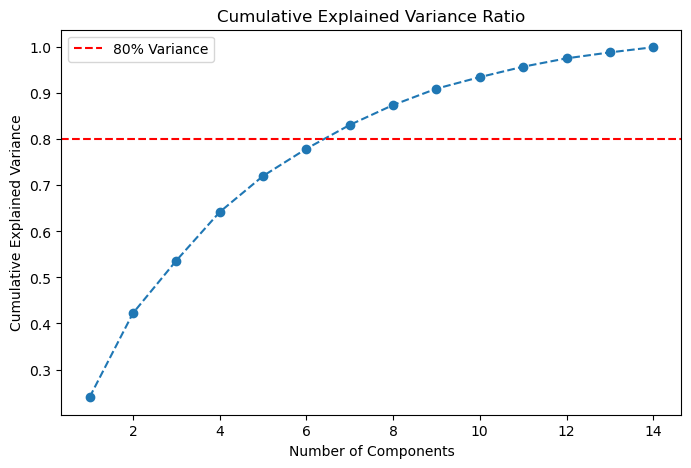

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from joblib import Parallel, delayed
from sklearn.metrics import silhouette_score

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA with more components
pca = PCA(n_components=scaled_data.shape[1])  # Use all components available
pca.fit(scaled_data)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance to see how many components explain > 80%
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()


In [2]:

# Decide how many components to retain based on cumulative variance ratio > 80%
n_components_needed = np.argmax(cumulative_variance_ratio >= 0.80) + 2
print(f"Number of components needed to explain > 80% variance: {n_components_needed}")

# Refit PCA with the selected number of components
pca = PCA(n_components=n_components_needed)
reduced_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio after refitting
print(f"Explained Variance Ratio after reducing components to {n_components_needed}: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance after reducing components: {np.cumsum(pca.explained_variance_ratio_)}")


Number of components needed to explain > 80% variance: 8
Explained Variance Ratio after reducing components to 8: [0.23989488 0.18242353 0.11430148 0.10536223 0.0783315  0.05922881
 0.05164438 0.04326517]
Cumulative Explained Variance after reducing components: [0.23989488 0.42231841 0.53661988 0.64198212 0.72031362 0.77954244
 0.83118682 0.87445199]


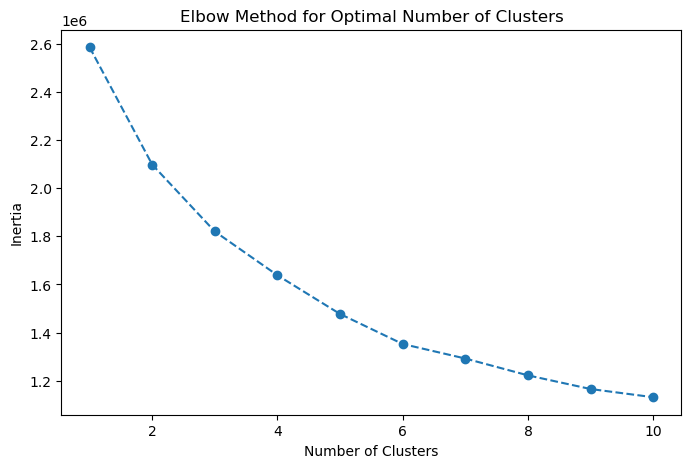

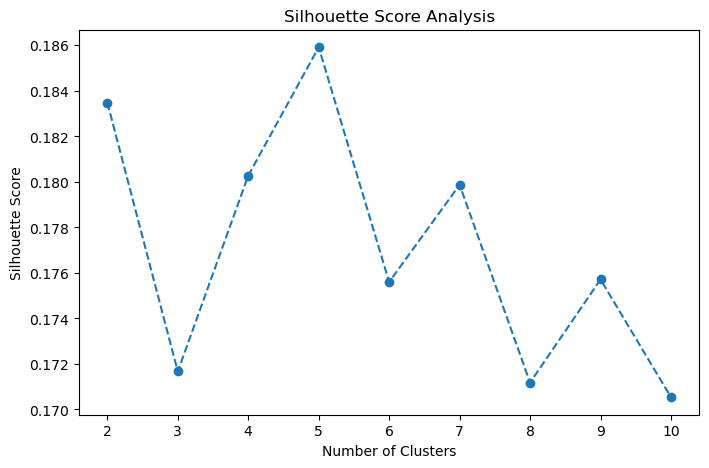

In [3]:

# Elbow Method for Optimal Number of Clusters
def elbow_method(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

# Function to calculate silhouette score for a given k
def calculate_silhouette_for_k(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    return silhouette_score(data, labels)


# Silhouette Score Analysis for Optimal Number of Clusters
def silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title("Silhouette Score Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

# Perform Elbow Method Analysis
elbow_method(reduced_data, max_clusters=10)


# Parallel computation for silhouette score for different cluster counts
silhouette_scores = Parallel(n_jobs=-1)(delayed(calculate_silhouette_for_k)(k, reduced_data) for k in range(2, 11))

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from joblib import Parallel, delayed
from sklearn.metrics import silhouette_score

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA with more components
pca = PCA(n_components=scaled_data.shape[1])  # Use all components available
pca.fit(scaled_data)
# Optimized KMeans clustering
def kmeans_clustering(data, n_clusters, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=n_init, algorithm='elkan')
    labels = kmeans.fit_predict(data)
    return labels

# Optimized silhouette calculation
def calculate_silhouette_score(data, labels):
    score = silhouette_score(data, labels)
    print(f"Silhouette Score: {score}")
    return score

# Refit PCA with the selected number of components
pca = PCA(n_components=8)
reduced_data = pca.fit_transform(scaled_data)

# Perform KMeans clustering on PCA reduced data
optimal_clusters = 5
kmeans_labels = kmeans_clustering(reduced_data, optimal_clusters)

# Calculate silhouette score
silhouette_score_kmeans = calculate_silhouette_score(reduced_data, kmeans_labels)

# Plot the clusters after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed



# Perform KMeans clustering with 4 clusters (without n_jobs in KMeans)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, algorithm='elkan')  # Removed n_jobs
kmeans_labels = kmeans.fit_predict(reduced_data)

# Calculate silhouette score using parallelization
def calculate_silhouette(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='elkan')
    labels = kmeans.fit_predict(reduced_data)
    return silhouette_score(reduced_data, labels)

# Silhouette score parallel computation for cluster sizes 2 to 10
silhouette_scores = Parallel(n_jobs=-1)(delayed(calculate_silhouette)(k) for k in range(2, 11))
optimal_silhouette_score = max(silhouette_scores)
print(f"Optimal Silhouette Score: {optimal_silhouette_score}")

# Plot the clusters with clear demarcation
plt.figure(figsize=(10, 7))

# Scatter plot with different colors for each cluster
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)

# Plot cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Set plot title and labels
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(scatter, label='Cluster ID')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from joblib import Parallel, delayed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Optimized KMeans clustering
def kmeans_clustering(r_data, n_clusters, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=n_init, algorithm='elkan')
    labels = kmeans.fit_predict(r_data)
    return labels


# Perform KMeans clustering on PCA reduced data
optimal_clusters = 5
kmeans_labels = kmeans_clustering(reduced_data, optimal_clusters)

# Plot the clusters after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

In [ ]:
optimal_clusters = 4
# GMM Clustering
def gmm_clustering(data, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

# Perform GMM clustering on PCA reduced data
gmm_labels = gmm_clustering(reduced_data, optimal_clusters)

# Calculate and print silhouette score for GMM clustering
silhouette_score_gmm = calculate_silhouette_score(reduced_data, gmm_labels)

# Plot GMM clusters after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title(f"GMM Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()


In [ ]:

# Hierarchical Clustering
def hierarchical_clustering(data, n_clusters, method='ward'):
    linkage_matrix = linkage(data, method=method)
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()
    
    return labels

# Perform hierarchical clustering on PCA reduced data
hier_labels = hierarchical_clustering(reduced_data, optimal_clusters)

# Calculate and print silhouette score for hierarchical clustering
silhouette_score_hier = calculate_silhouette_score(reduced_data, hier_labels)

# Plot Hierarchical Clustering results after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hier_labels, cmap='viridis', s=10)
plt.title(f"Hierarchical Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()


In [ ]:


# Print silhouette scores for each clustering method
print(f"Silhouette Score for KMeans: {silhouette_score_kmeans}")
print(f"Silhouette Score for GMM: {silhouette_score_gmm}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_score_hier}")